Noms i NIU dels integrants:
  - **Nom:** David Morillo Massagué
  - **NIU:** 1666540
  - **Nom:** Adrià Muro Gómez
  - **NIU:** 1665191
  - **Nom:** Lucia Garrido Rosas
  - **NIU:** 1671463

## Dataset utilitzat:

https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset 

## Llibreries utilitzades

In [1]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from metrics_module import metrics
from dataloader_module import load_data, resample_data
from graphs_module import plot_roc_auc

## Càrrega i pre-processament de les dades

In [3]:
datafile = "data/healthcare-dataset-stroke-data.csv"

X, y = load_data(datafile)
#X.drop(columns=["age"], inplace=True)
print(f"X shape: {X.shape}, y shape: {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X shape: (4908, 18), y shape: (4908,)


### Sense canvis

Accuracy: 0.9460
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


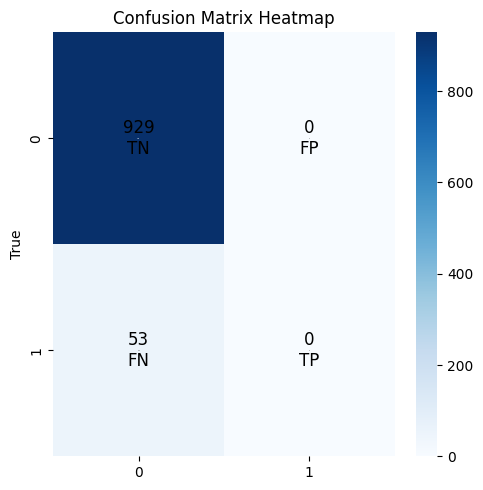

In [4]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy, precision, recall, f1, conf_matrix = metrics(y_test, y_pred, print_metrics=True)

### Paràmetre "balanced"

Accuracy: 0.7536
Precision: 0.1588
Recall: 0.8302
F1 Score: 0.2667


c:\Users\david\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


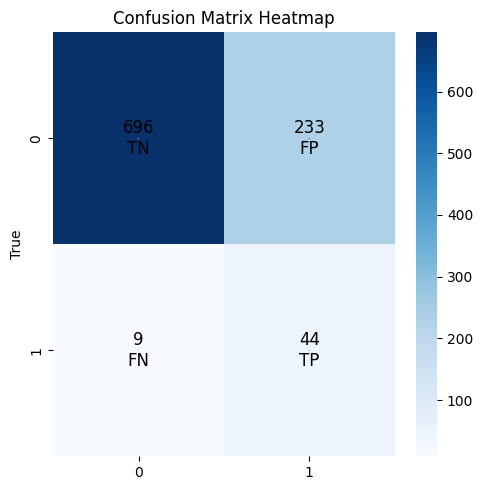

In [5]:
clf = LogisticRegression(max_iter=1000, class_weight="balanced")
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy, precision, recall, f1, conf_matrix = metrics(y_test, y_pred, print_metrics=True)

### Pes manual per a les classes

Accuracy: 0.9430
Precision: 0.2857
Recall: 0.0377
F1 Score: 0.0667


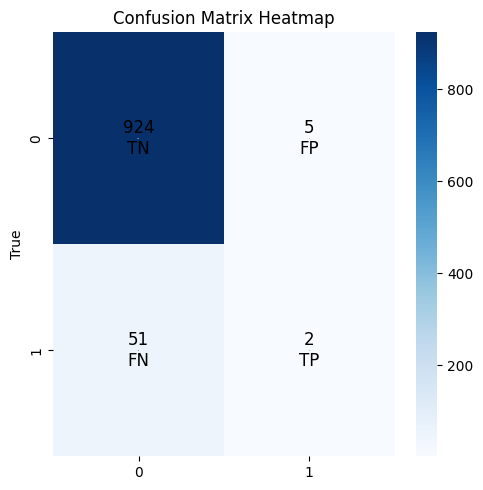

In [6]:
clf = LogisticRegression(max_iter=1000, class_weight={0: 1, 1: 2})
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy, precision, recall, f1, conf_matrix = metrics(y_test, y_pred, print_metrics=True)

### Apliquem **SMOTE** només a les dades d'entrenament, per tal de no introduir cap tipus de bias en les dades de test.	

Accuracy: 0.9063
Precision: 0.1695
Recall: 0.1887
F1 Score: 0.1786


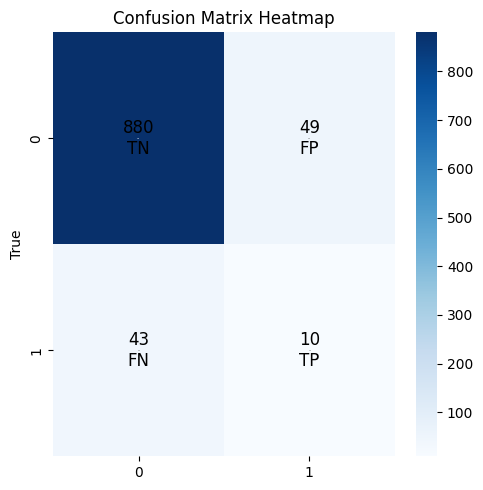

In [7]:
X_train, y_train = resample_data(X_train, y_train)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy, precision, recall, f1, conf_matrix = metrics(y_test, y_pred, print_metrics=True)

### SMOTE + Balanced

Accuracy: 0.9063
Precision: 0.1695
Recall: 0.1887
F1 Score: 0.1786


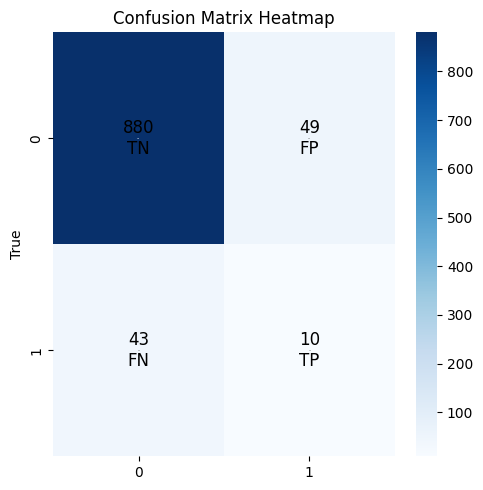

In [8]:
clf = LogisticRegression(max_iter=1000, class_weight="balanced")
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy, precision, recall, f1, conf_matrix = metrics(y_test, y_pred, print_metrics=True)

## ROC Curve i AUC

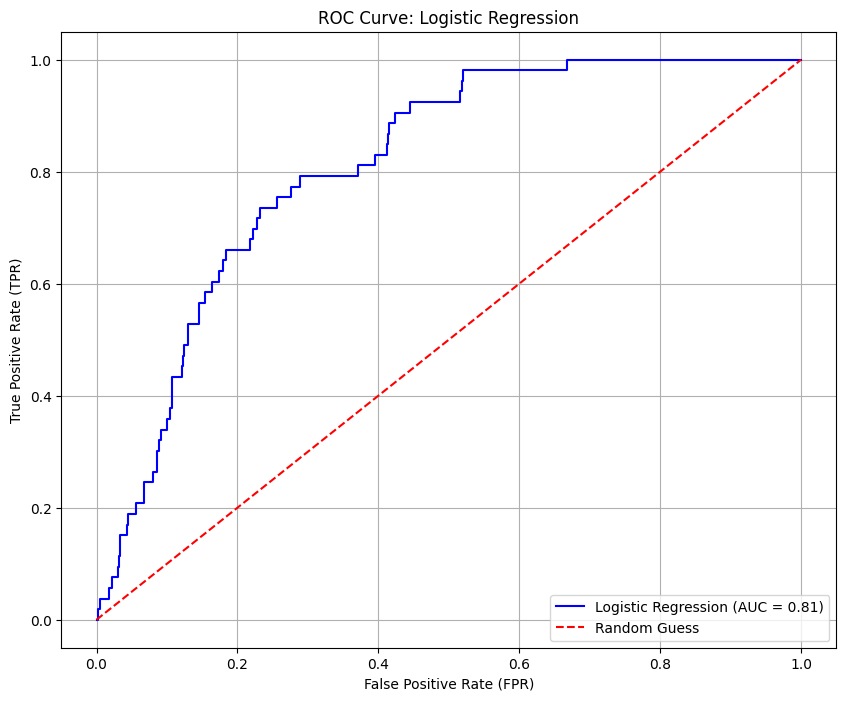

Logistic Regression AUC Score: 0.81


In [9]:
plot_roc_auc(clf, X_train, y_train, X_test, y_test, model_name="Logistic Regression")

## Visualització dels factors més importants pel model

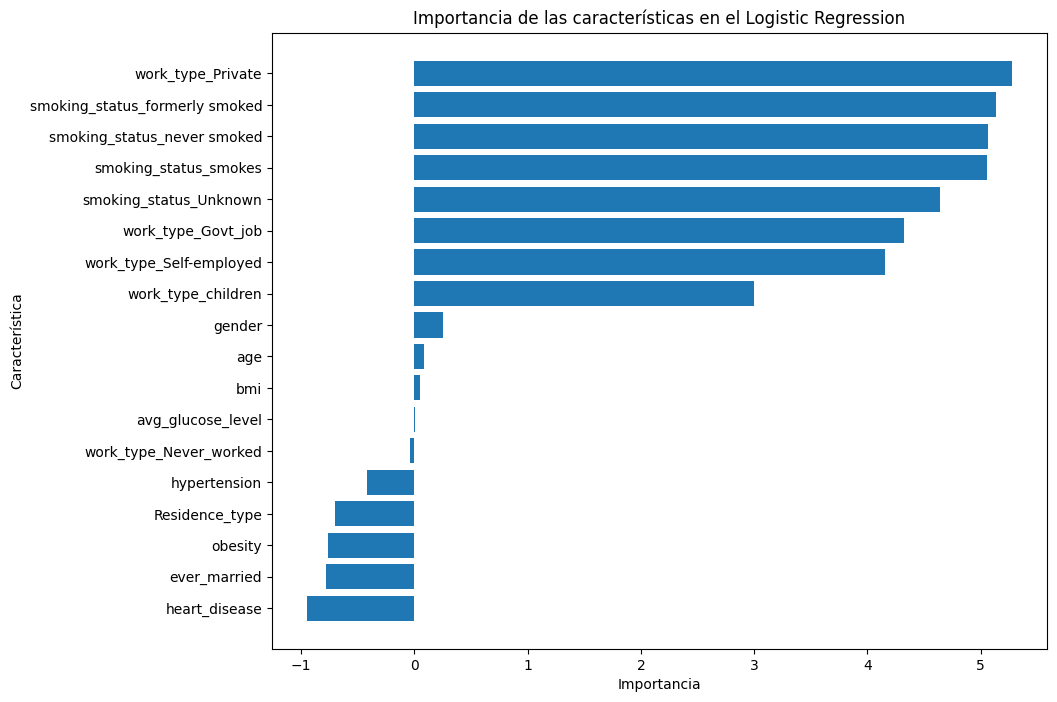

In [10]:
feature_importances = clf.coef_[0]

feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las características en el Logistic Regression')
plt.gca().invert_yaxis()
plt.show()

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance

# compute importances
model_fi = permutation_importance(clf, X, y)
model_fi['importances_mean']

# create a dataframe with feature importances
fi_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model_fi['importances_mean']
})

# sort the dataframe by importance
fi_df = fi_df.sort_values(by='Importance', ascending=False)

# print the sorted feature importances
for index, row in fi_df.iterrows():
    print(f"{row['Feature']}: {row['Importance']}")

smoking_status_Unknown: 0.16491442542787288
smoking_status_never smoked: 0.14682151589242054
work_type_Private: 0.12355338223308887
smoking_status_formerly smoked: 0.0907905460472698
smoking_status_smokes: 0.08691931540342301
work_type_Self-employed: 0.07473512632436838
work_type_Govt_job: 0.0671149144254279
work_type_children: 0.05325998370008152
age: 0.0327628361858191
ever_married: 0.01654441727791365
obesity: 0.009698451507742489
heart_disease: 0.005867970660146704
hypertension: 0.0036674816625916983
bmi: 0.0031784841075795044
gender: 0.0004482477587612221
work_type_Never_worked: 0.0
Residence_type: -0.0002852485737570909
avg_glucose_level: -0.0037489812550937085


## Eliminació d'alguns factors

Prova per a evaluar si es poden generar prediccions sense dades mèdiques, més accessibles per a la població general.

Accuracy: 0.9460
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


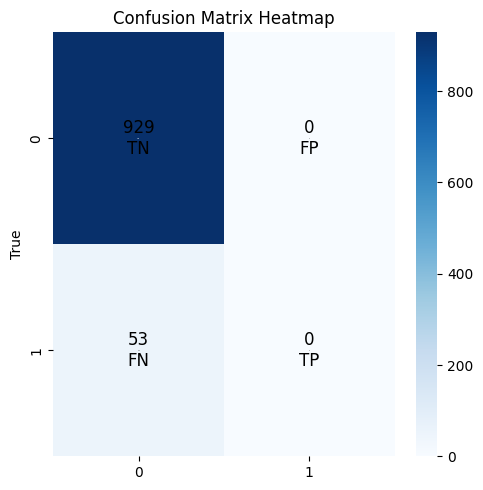

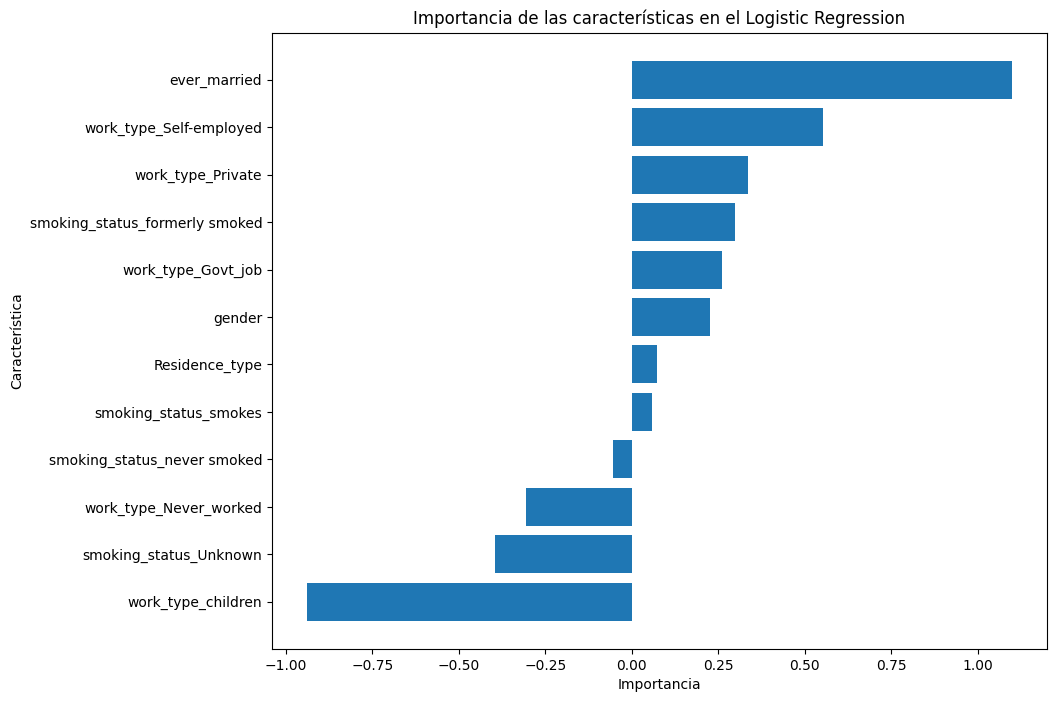

In [12]:
X = X.drop(columns=["hypertension", "heart_disease", "avg_glucose_level", "age", "bmi", "obesity"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy, precision, recall, f1, conf_matrix = metrics(y_test, y_pred, print_metrics=True)

feature_importances = clf.coef_[0]

feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las características en el Logistic Regression')
plt.gca().invert_yaxis()
plt.show()

## ROC Curve i AUC

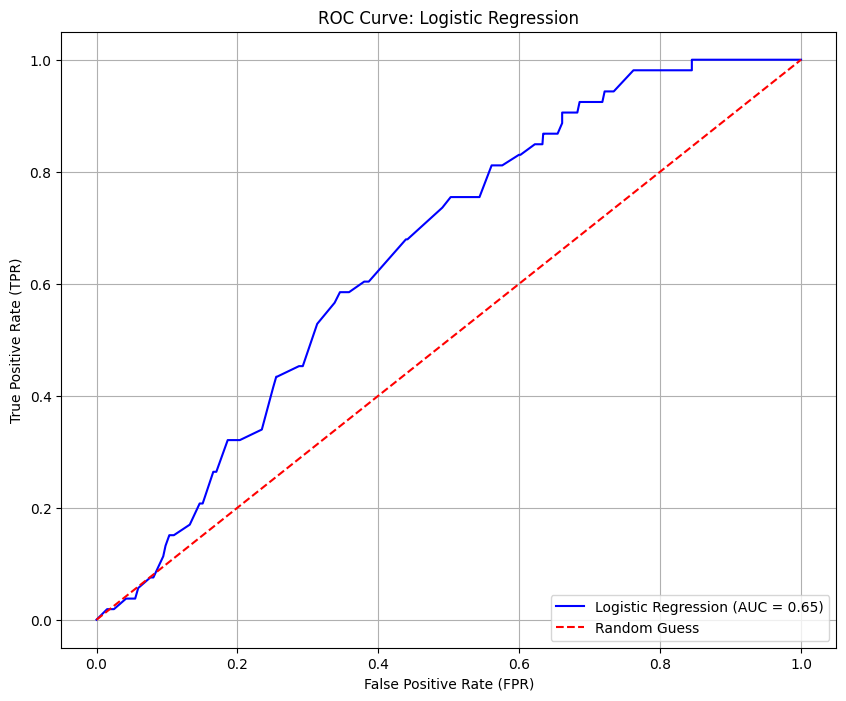

Logistic Regression AUC Score: 0.65


In [13]:
plot_roc_auc(clf, X_train, y_train, X_test, y_test, model_name="Logistic Regression")